[파이썬으로 특정 키워드를 포함하는 신문기사 웹크롤링](http://yoonpunk.tistory.com/4)  
[파이썬 웹크롤러를 만드는 기초](http://f4strada4.cafe24.com/?p=1121)  
[파이썬으로 웹 크롤러 만들기](http://www.hanbit.co.kr/channel/category/category_view.html?cms_code=CMS6168044195)  
[html 버전](https://twpower.github.io/84-how-to-use-beautiful-soup)  
[KoNLPy 논문](http://dmlab.snu.ac.kr/~lucypark/docs/2014-10-10-hclt.pdf)  
[감성분석기 개발](http://hugman.re.kr/blog/sentiment_analysis/)  
[자연어 처리 문제 유형](http://hugman.re.kr/blog/nlp_problem_category/)  
아래 내용은 상기 링크를 정리한것.

# 네이버 뉴스 기사 크롤링

In [106]:
## bs4모듈에서 BeautifulSoup 함수를 불러온다.
from bs4 import BeautifulSoup 
## URL을 열고 HTML을 읽는 모듈, urllib를 불러온다.
import urllib.request 

In [107]:
## output file name
output_file_name = 'naver_crawling.txt'
## URL
URL = 'http://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=732&oid=015&aid=0003956688'

## find()와 findAll()
find()와 findAll()은 BeautifulSoup에서 가장 자주 쓰이는 함수이다.  
이 함수를 쓰면 HTML 페이지에서 원하는 태그를 다양한 속성에 따라 쉽게 필터링이 가능하다.  
두 함수는 거의 비슷하며 함수의 정의 또한 비슷하다
```python
find_all(tag, attributes, recursive, text, limit, keywords)
find(tag, attributes, recursive, text, keywords)
```
find_all(): 조건에 맞는 모든 태그들을 가져온다.  
find():해당 조건에 맞는 하나의 태그를 가져온다.   
중복이면 첫번째 태그를 가져온다.

In [108]:
## 크롤링 함수
def get_text(URL):
    source_code_from_URL = urllib.request.urlopen(URL)
    '''
    해당 웹주소를 열고 Beautifulsoup으로 변수화 시킨다.
    BeautifulSoup객체 생성자의 2번재 인자로 'lxml'을 사용해 기존 'html'방식 대식 'lxml'방식으로 파싱하고,
    한글이 포함된 기사이기 때문에 encoding을 utf-8 방식을 채용했다.
    ''' 
    soup = BeautifulSoup(source_code_from_URL, 'lxml', from_encoding='utf-8')
    text = ''
    ## find_all 
    for t in soup.find_all('div', id="articleBodyContents"):
        text = text + str(t.find_all(text=True))
    return text

## 메인 함수
def main():
    open_output_file = open(output_file_name, 'w')
    result_text = get_text(URL)
    open_output_file.write(result_text)
    open_output_file.close()

[html 버전](https://twpower.github.io/84-how-to-use-beautiful-soup)  

In [109]:
'''
html버전으로 크롤링하기
with open("example.html") as fp:
    soup = BeautifulSoup(fp, 'html.parser')
'''

'\nhtml버전으로 크롤링하기\nwith open("example.html") as fp:\n    soup = BeautifulSoup(fp, \'html.parser\')\n'

In [110]:
'''
메인 함수를 별도로 만들고 __name__을 이용해 main함수를 실행시켰다.
'''
if __name__ == '__main__':
    main()

In [111]:
'''
텍스트 정제 모듈
특수기호 모두 제거
'''
import re

## 입,출력 파일명
input_file_name = 'naver_crawling.txt'
output_file_name = 'naver_crawling_filter.txt'

## fillter 함수
def filter_text(text):
    filter_text = re.sub('[a-zA-Z]', '', text)
    filter_text = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]','',filter_text)
    return filter_text

# 메인함수
def main():
    read_file = open(input_file_name, 'r')
    
    write_file = open(output_file_name, 'w')
    text = read_file.read()
    print("---------수정 전---------")
    print(text)
    text = fillter_text(text)
    print()
    print("---------수정 후---------")
    print(text)
    write_file.write(text)
    read_file.close()
    write_file.close()

In [112]:
if __name__ == '__main__':
    main()

---------수정 전---------
['\n', ' 본문 내용 ', '\n', ' TV플레이어 ', '\n', ' // TV플레이어 ', '\n', '\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n', '\n', "'유니버시티 블록체인 리서치 이니셔티브' 프로젝트 수행", '고려대 본관. / 사진=한경 DB', '고려대가 글로벌 블록체인 기업 리플(Ripple)과 파트너십을 체결해 관련 전문인력 양성과 연구 프로젝트 수행에 나선다.', '리플은 블록체인을 이용해 저렴하면서 빠른 송금 서비스를 제공하는 회사로 자체 암호토큰 XRP를 이용한 서비스도 제공한다.', '7일 고려대에 따르면 이 대학 정보보호대학원 블록체인보안연구센터는 지난 4일 리플과 장기 연구 프로젝트 ‘유니버시티 블록체인 리서치 이니셔티브(University Blockchain Research Initiative)’ 수행을 위한 파트너십을 맺었다.', '세계 유수의 대학들과 함께 블록체인 및 암호화폐 관련 학문적·기술적 연구를 수행하도록 지원하는 연구 프로젝트다. 이 프로젝트 수행을 위해 리플과 파트너십을 맺은 대학은 MIT(매사추세츠공대) 프린스턴대 스탠퍼드대 등 전세계 17곳으로 국내에서는 고려대가 유일하다.', '파트너십 체결에 따라 고려대 블록체인보안연구센터는 블록체인 합의 알고리즘의 안전성, 스마트 콘트랙트(smart contract)의 안전성 등 블록체인 및 암호화폐에 필요한 보안 기술을 중점적으로 연구하며 리플은 연구 수행에 필요한 재정적·기술적 지원을 제공한다.', '아울러 사회적으로 부족한 블록체인 전문가를 양성하는 효과도 있을 것으로 예상된다.', '에릭 반 밀텐버그 리플 비즈니스 운영 수석부사장은 “‘유니버시티 블록체인 리서치 이니셔티브’는 대학이 블록체인 기술의 혁신에 있어 중요 역할을 할 수 있게 하는 디딤돌이 될 것”이라며 “블록체인 관련 산업체에서 일할 수 있는 인력을 길러내는 효과도 있을 것

# 형태소 분석과 품사 태깅

In [1]:
from konlpy.corpus import kolaw
from konlpy.utils import concordance
f = open('naver_crawling_filter.txt', 'r')
line = f.read()
print(line)

[  본문 내용    플레이어     플레이어     오류를 우회하기 위한 함수 추가    유니버시티 블록체인 리서치 이니셔티브 프로젝트 수행 고려대 본관  사진한경  고려대가 글로벌 블록체인 기업 리플과 파트너십을 체결해 관련 전문인력 양성과 연구 프로젝트 수행에 나선다 리플은 블록체인을 이용해 저렴하면서 빠른 송금 서비스를 제공하는 회사로 자체 암호토큰 를 이용한 서비스도 제공한다 7일 고려대에 따르면 이 대학 정보보호대학원 블록체인보안연구센터는 지난 4일 리플과 장기 연구 프로젝트 ‘유니버시티 블록체인 리서치 이니셔티브   ’ 수행을 위한 파트너십을 맺었다 세계 유수의 대학들과 함께 블록체인 및 암호화폐 관련 학문적·기술적 연구를 수행하도록 지원하는 연구 프로젝트다 이 프로젝트 수행을 위해 리플과 파트너십을 맺은 대학은 매사추세츠공대 프린스턴대 스탠퍼드대 등 전세계 17곳으로 국내에서는 고려대가 유일하다 파트너십 체결에 따라 고려대 블록체인보안연구센터는 블록체인 합의 알고리즘의 안전성 스마트 콘트랙트 의 안전성 등 블록체인 및 암호화폐에 필요한 보안 기술을 중점적으로 연구하며 리플은 연구 수행에 필요한 재정적·기술적 지원을 제공한다 아울러 사회적으로 부족한 블록체인 전문가를 양성하는 효과도 있을 것으로 예상된다 에릭 반 밀텐버그 리플 비즈니스 운영 수석부사장은 “‘유니버시티 블록체인 리서치 이니셔티브’는 대학이 블록체인 기술의 혁신에 있어 중요 역할을 할 수 있게 하는 디딤돌이 될 것”이라며 “블록체인 관련 산업체에서 일할 수 있는 인력을 길러내는 효과도 있을 것”이라고 말했다 이상진 고려대 정보보호대학원장도 “이번 파트너십 체결과 프로젝트 수행으로 리플의 실제 데이터에 접근해 분석해보는 기회를 갖게 됐다 실용적인 블록체인 보안기술 개발에 중요한 역할을 할 것으로 기대된다”고 부연했다 김봉구 한경닷컴 기자  9 기사제보 및 보도자료   [ 한경닷컴 바로가기  [ 글방  [ 모바일한경 구독신청   ⓒ 한국경제     무단전재 및 재배포 금지   본문 내용 

In [2]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()
pprint(kkma.pos(line))

[('[', 'SS'),
 ('본문', 'NNG'),
 ('내용', 'NNG'),
 ('플레이어', 'NNG'),
 ('플레이어', 'NNG'),
 ('오류', 'NNG'),
 ('를', 'JKO'),
 ('우회', 'NNG'),
 ('하', 'XSV'),
 ('기', 'ETN'),
 ('위하', 'VV'),
 ('ㄴ', 'ETD'),
 ('함수', 'NNG'),
 ('추가', 'NNG'),
 ('유니', 'NNP'),
 ('버시', 'UN'),
 ('티', 'NNG'),
 ('블록', 'NNG'),
 ('체인', 'NNG'),
 ('리서치', 'NNG'),
 ('이니셔티브', 'NNG'),
 ('프로젝트', 'NNG'),
 ('수행', 'NNG'),
 ('고려대', 'NNG'),
 ('본관', 'NNG'),
 ('사진', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('경', 'NNG'),
 ('고려대', 'NNG'),
 ('가', 'JKS'),
 ('글로벌', 'NNG'),
 ('블록', 'NNG'),
 ('체인', 'NNG'),
 ('기업', 'NNG'),
 ('리플', 'NNG'),
 ('과', 'JC'),
 ('파트너십', 'NNG'),
 ('을', 'JKO'),
 ('체결', 'NNG'),
 ('하', 'XSV'),
 ('어', 'ECS'),
 ('관련', 'NNG'),
 ('전문', 'NNG'),
 ('인력', 'NNG'),
 ('양성', 'NNG'),
 ('과', 'JC'),
 ('연구', 'NNG'),
 ('프로젝트', 'NNG'),
 ('수행', 'NNG'),
 ('에', 'JKM'),
 ('나서', 'VV'),
 ('ㄴ다', 'ECS'),
 ('리플', 'NNG'),
 ('은', 'JX'),
 ('블록', 'NNG'),
 ('체인', 'NNG'),
 ('을', 'JKO'),
 ('이용', 'NNG'),
 ('하', 'XSV'),
 ('어', 'ECS'),
 ('저렴', 'XR'),
 ('하', 'XSA'),
 ('면

# 키워드 분석

## 최빈 형태소 Top5

In [8]:
from collections import Counter
import konlpy

doc = line
pos = kkma.pos(doc)
cnt = Counter(pos)
konlpy.utils.pprint(cnt.most_common(5))
print()
print(cnt.most_common(5))

[(('하', 'XSV'), 20),
 (('ㄴ', 'ETD'), 15),
 (('체인', 'NNG'), 14),
 (('블록', 'NNG'), 13),
 (('을', 'JKO'), 11)]

[(('하', 'XSV'), 20), (('ㄴ', 'ETD'), 15), (('체인', 'NNG'), 14), (('블록', 'NNG'), 13), (('을', 'JKO'), 11)]


## 문서 탐색

nchars  :  1001
ntokens :  226
nmorphs :  216

Top 10 frequent morphemes:
[(('하', 'XSV'), 20),
 (('ㄴ', 'ETD'), 15),
 (('체인', 'NNG'), 14),
 (('블록', 'NNG'), 13),
 (('을', 'JKO'), 11),
 (('에', 'JKM'), 8),
 (('연구', 'NNG'), 8),
 (('는', 'ETD'), 7),
 (('리플', 'NNG'), 7),
 (('어', 'ECS'), 7)]

Word of "블록" in the document : 
11	함수 추가 유니버시티 블록체인 리서치 이니셔티브
21	사진한경 고려대가 글로벌 블록체인 기업 리플과
34	수행에 나선다 리플은 블록체인을 이용해 저렴하면서
54	이 대학 정보보호대학원 블록체인보안연구센터는 지난 4일
62	연구 프로젝트 ‘유니버시티 블록체인 리서치 이니셔티브
74	유수의 대학들과 함께 블록체인 및 암호화폐
105	체결에 따라 고려대 블록체인보안연구센터는 블록체인 합의
106	따라 고려대 블록체인보안연구센터는 블록체인 합의 알고리즘의
115	의 안전성 등 블록체인 및 암호화폐에
133	아울러 사회적으로 부족한 블록체인 전문가를 양성하는
148	운영 수석부사장은 “‘유니버시티 블록체인 리서치 이니셔티브’는
152	리서치 이니셔티브’는 대학이 블록체인 기술의 혁신에
165	디딤돌이 될 것”이라며 “블록체인 관련 산업체에서
194	갖게 됐다 실용적인 블록체인 보안기술 개발에


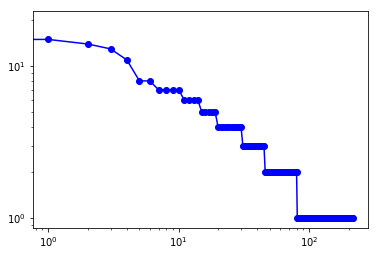

In [10]:
from collections import Counter

from konlpy.corpus import kolaw
from konlpy.tag import Hannanum
from konlpy.utils import concordance, pprint
from matplotlib import pyplot

def draw_zipf(count_list, filename, color = 'blue', marker = 'o'):
    sorted_list = sorted(count_list, reverse=True)
    pyplot.plot(sorted_list, color=color, marker=marker)
    pyplot.xscale('log')
    pyplot.yscale('log')
    pyplot.savefig(filename)
    
print('nchars  : ', len(doc))
print('ntokens : ', len(doc.split()))
print('nmorphs : ', len(set(pos)))
print('\nTop 10 frequent morphemes:'); pprint(cnt.most_common(10))
print('\nWord of "블록" in the document : ')
concordance(u'블록', doc, show=True)
draw_zipf(cnt.values(), 'zipf.png')

# 감성 분석기

## 문제 정의
감성분석은 감성의 극성(Polarity)를 긍정/부정/중립/객과의 4가지로 구분한다.  
ex)
* [긍정] 다음에 또 가려 구요!
* [부정] 비좁은 느낌을 가져다 줄지도!
* [중립] 역시나 비싼 호텔인가 싶어요.
* [객관] 무료 Wi-Fi


이러한 유형의 **자연어 처리 문제**는 대표적인 N21 문제이다.  
즉, N 개의 token을 읽고, 1개의 값으로 출력하는 문제이다.  

### 자연어 처리 문제 유형(NLP problem category)

keyword : end - to - end(한쪽 끝에서 다른쪽 끝까지)

어떠한 [종류의 자연어 처리 문제](http://hugman.re.kr/blog/nlp_problem_category/)든지 End-to-end 입장에서 추상화 하면 몇가지 유형으로 분류 할 수 있다.  
일단 한번 문제를 잘 정의된 frame으로 유형화 시켜놓으면,  
각 유형 별로 잘 작동하는 방법론을 순차적으로 적용해 볼수 있다.  
아래의 표가 그 유형이다.  
[표 : 자연어 처리 문제 유형, (둥근 박스(round box): 입력단위(token))]
![자연어 처리 문제 유형](http://hugman.re.kr/static/media/uploads/nlp_problems.png)

## 데이터 수집 및 가공
상용 시스템을 위한 구현이 아니므로,  
문장 길이가 128 문자(character) 미만인 문장들만 활용하여,  
훈련 데이터를 만들어 둔다.  
이러한 데이터를 적당히 가공하여 아래와 같은 포맷으로 만든다.  
![train data](http://hugman.re.kr/static/media/uploads/senti_data.png)